# Linear Regression the Hard Way

Task: fit a linear regression using gradient descent

## Setup

In [12]:
import numpy as np
np.set_printoptions(precision=3)
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Task

Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`. We'll have a few possible datasets.

In [13]:
DATASET = 'toy2'

if DATASET == 'toy':
    x = np.array([0, 1, 2, 3])[:, np.newaxis]
    y_true = np.array([-1, .5, 2.0, 3.5])[:, np.newaxis]
if DATASET == 'toy2':
    x = np.array([0, 1, 2, 3])[:, np.newaxis]
    y_true = np.array([-1, .5, 2.0, 25])[:, np.newaxis]
elif DATASET == "temps":
    data = pd.read_csv("https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv", skiprows=1)
    # Shape x to be items-by-features
    x = data.iloc[:, 0].values.astype(np.float32)[:, np.newaxis]
    # scale x to a reasonable range
    x -= 1880.0
    x /= 100.
    y_true = data.iloc[:, 1].values.astype(np.float32)[:, np.newaxis]


(4, 1) (4, 1)


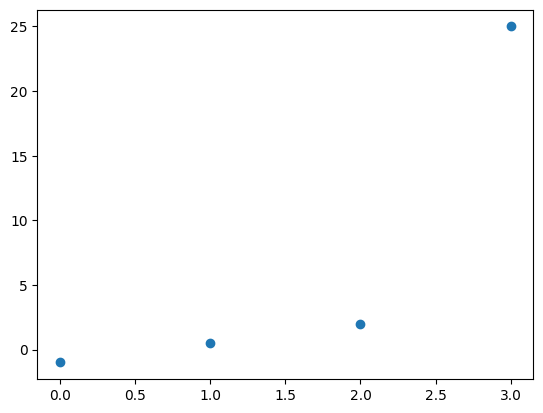

In [14]:
if len(x) < 50.:
    plt.scatter(x, y_true)
else:
    plt.plot(x, y_true)
print(x.shape, y_true.shape)

Create some features that we'll need later; don't worry about this code right now.

In [15]:
# a simple hardcoded linear layer
pretend_first_layer_out = x @ np.ones((1, 2)) + np.array([0.0, -0.5])
# a rectifier
pretend_first_layer_activations = np.maximum(pretend_first_layer_out, 0.0)
f1, f2 = pretend_first_layer_activations.T

This notebook will be a bit different from usual: you'll be editing a *single* block of code. So the final notebook won't show your intermediate steps. That doesn't mean they aren't important; make sure you successfully complete each step before moving on to the next one.

Final Loss: 34.717, final weights: [7.789], final bias: [-4.955]


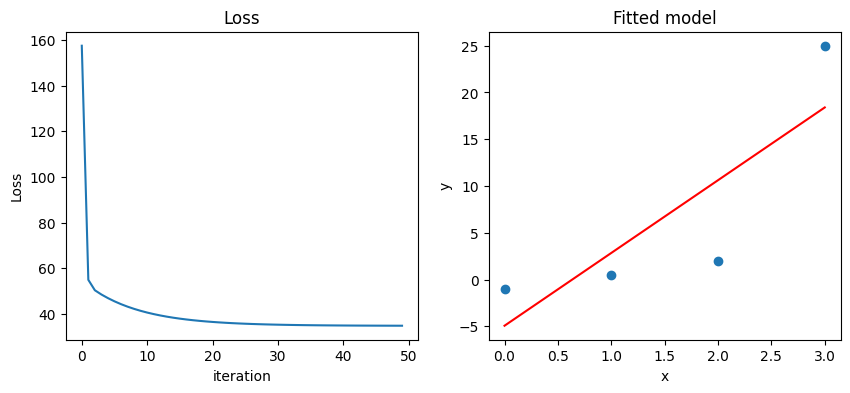

In [16]:
## Working Cell

# Set hyperparameters
learning_rate = 0.1
num_iter = 50

# Initialize parameters
weights = np.array([[0.0]])
bias = np.array([0.0])

# Keep a log of loss values
losses = []

## Do your work here.

for i in range(num_iter):
    #STEP 1. Forward Pass
    y_pred = np.dot(x, weights) + bias
    residuals = y_true - y_pred
    #mae_loss = np.mean(abs(residuals))
    #losses.append(mae_loss)
    
    #STEP 7: Switch the loss to MSE
    mse_loss = np.mean((y_true - y_pred) ** 2)
    losses.append(mse_loss)

    #STEP 2. Backprop through the loss
    n_points = x.shape[0]
    signs = np.sign(y_true - y_pred)
    #y_pred_grad = -(signs / n_points)
    y_pred_grad = 2 * residuals/(-1 * n_points)

    #STEP 3. Backprop through adding bias
    bias_grad = np.sum(y_pred_grad)
    #STEP 6: Backprop through the weights
    weights_grad = np.dot(x.T, y_pred_grad)

    #STEP 4: Gradient Descent
    bias -= (learning_rate * bias_grad)
    #STEP 6: Backprop through the weights
    weights -= learning_rate * weights_grad


# Plot the results
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
axs[0].plot(losses)
axs[0].set(title="Loss", xlabel="iteration", ylabel="Loss")
axs[1].scatter(x, y_true)
axs[1].plot(x, y_pred, 'r');
axs[1].set(title="Fitted model", xlabel='x', ylabel='y')
print(f"Final Loss: {losses[-1]:.3f}, final weights: {weights.flatten()}, final bias: {bias}")